<a href="https://colab.research.google.com/github/ravi-prakash1907/Data-Structures-and-Algo/blob/main/Submissions/Group%20Projects/Project2/Abstract_Art_Album_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 2**

## An Image Album of Abstract Art 

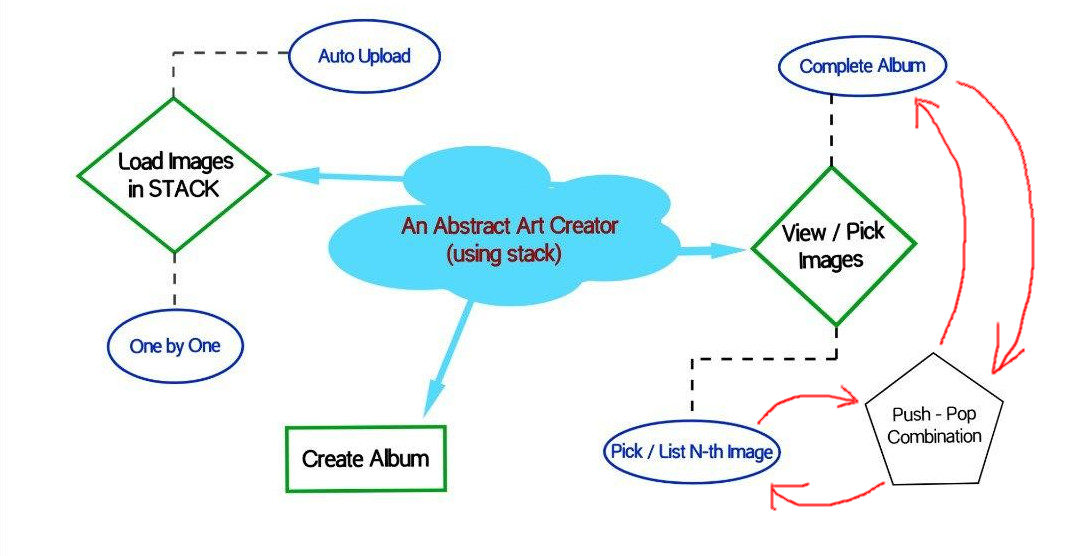

_**([Final Report Here!!](https://docs.google.com/document/d/1tCq8R-g7fVw8cI5HVOROtwDN6PlUPQJDHUIjt4MMNos/edit?usp=sharing))**_



### _Libraries_

In [ ]:
from IPython.display import clear_output
from random import randint
import numpy as np
import array
import os

from PIL import Image

## _**Image Storage**_

### **NODE**

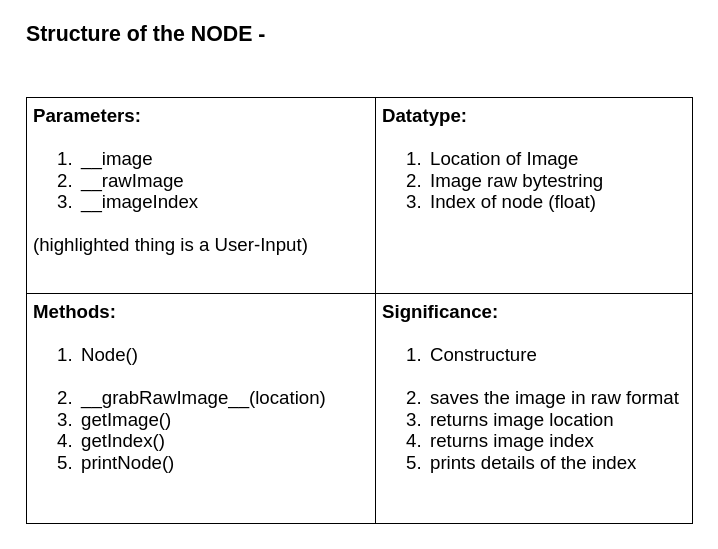



In [ ]:
class Node:
  def __init__(self, location, imageIndex):
    # parameters ---> private to this class
    self.__image = location 
    self.__rawImage = self.__grabRawImage__(location)
    self.__imageIndex = float(imageIndex)    
    # link
    self.next = None
  
  ###############################
  
  # Setters
  def __grabRawImage__(self, loc):
    readFile = open(loc, 'rb')
    readData = readFile.readlines()
    readFile.close()
    return readData
  
  ############################

  # Getters  
  def getImage(self):
    return self.__image
  
  def getIndex(self):
    return self.__imageIndex
  
  def getRawImage(self):
    for lines in range(5):
      print(self.__rawImage[lines])
    return self.__rawImage
  
  
  def printNode(self):
    print("\nIndex: ",self.getIndex())
    print("Image: ",self.getImage())

### Images Stack  - max 10

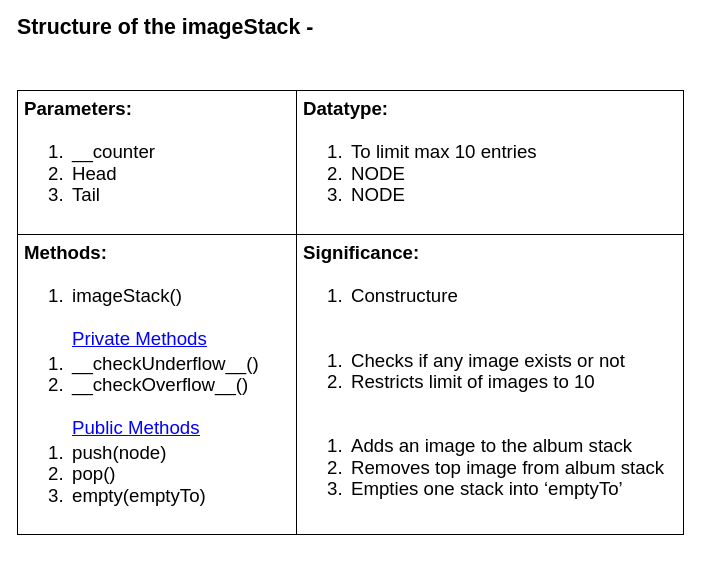

In [ ]:
## structure of the Bucket to store every history as a details (as one NODE)
class imageStack:
  def __init__(self):
    self.__counter = 0 # maximum val 10
    self.head = None
    self.tail = None


  ##############################

  # checking underflow condition
  def __checkUnderflow__(self):
    if self.head == None:
      return True
    return False
  
  # checking overflow condition
  def __checkOverflow__(self):
    if self.__counter == 10:
      return True
    return False
  
  ##############################



  #######################################
  # adding the element
  #######################################

  def push(self, nodeOrLocation = None):
    if self.__checkOverflow__():
      print("Oops!! Image Stack Overflow!")
      return False
    else:
      self.__counter += 1
      if isinstance(nodeOrLocation, Node):
        temp = nodeOrLocation
      elif isinstance(nodeOrLocation, str):
        temp = Node(nodeOrLocation, self.__counter)
      
      if self.head is None:
        self.head = self.tail = temp
      else:
        temp.next = self.head
        self.head = temp
        return True
  
  #######################################
  # deleting the url
  #######################################

  def pop(self):
    if self.__checkUnderflow__():
      #print("Oops!! Image stack underflow!")
      return False
    else:
      popped = self.head    
      self.head = self.head.next
      self.__counter -= 1
      popped.next = None
      return popped
  
  #######################################
  # empty temporary stack into given 
  #######################################

  def empty(self,emptyTo):
    if self.__checkUnderflow__():
      return False
    else:
      popped = self.pop()
      emptyTo.push(popped)
      self.empty(emptyTo)
      return True

### _**Image Processor**_  

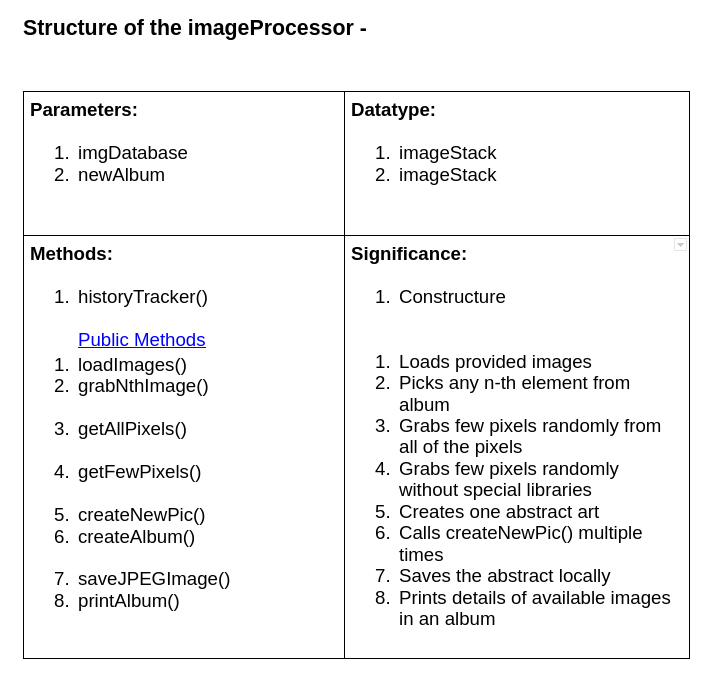

In [ ]:
class imageProcessor:
  def __init__(self):
    self.imgDatabase = imageStack()
    self.newAlbum =  imageStack()

  ########################

  #######################################
  # create album
  #######################################

  def createAlbum(self, limit = 10):
    print("\nHold on! Your album of " + str(limit) + " images is being created...\n")
    if 'newAlbum' not in os.listdir():
      os.mkdir("newAlbum")
    
    for imgNum in range(0,limit):
      imageName = 'newAlbum/' + str(imgNum+1) + '.ppm'
      if not self.createNewPic(imageName):
        break
      else:
        # changing the format
        im = Image.open(imageName)    
        im.save(imageName[:-3]+'jpg')
        os.system("rm "+imageName)
        self.newAlbum.push(imageName[:-3]+'jpg')
    

  #######################################
  # creating pic
  #######################################

  def createNewPic(self, newFilename):
    count = 0
    availableImgs = []
    while True:
      popped = self.grabNthImage(count+1)
      if popped:
        availableImgs.append(popped.getImage())
        count += 1
      else:
        break
    
    if availableImgs != []:
      pixelsList = []
      for fName in availableImgs:
        pixelsList.extend(self.getAllPixels(fName))
        #pixelsList.extend(self.getFewPixels(fName))
      
      if len(pixelsList) > 0:
        self.saveJPEGImage(pixelsList, newFilename)
        return True
    else:
      return False
  

  #######################################
  # loading raw images
  #######################################

  def loadImages(self):
    print("\n<----\tImages must either be of JPG or JPEG in format\t---->\n")
    subMenu = "\n1) Load an image by location \n2) Auto upload images from a directory"
    choice = input(subMenu+"\nEnter your choice: ")
    flag = True
    
    if choice == '1':
      img = input("Enter the location of directory of images (JPG/JPEG): ")
      if img[-4:] == '.jpg' or img[-5:] == '.jpeg':
        if self.imgDatabase.push(img) is False:
          print("You can not load images any more!!")
      else:
        print("Not a jpg/jpeg file!!")
        flag = False
    
    elif choice == '2':
      path = input("Enter the location of directory of images (JPG/JPEG): ")
      if not path:
        path = './'
      elif path[-1] != '/':
        path += '/'
      
      dirs = []
      for img in os.listdir( path ):
        if img[-4:] == '.jpg' or img[-5:] == '.jpeg':
          dirs.append(img)
      if len(dirs) == 0:
        print("No jpg/jpeg file found!!")
        flag = False
      else:
        if path == './'  :
          path = ''
        for img in dirs:
          if self.imgDatabase.push(path+img) == False:
            flag = True
            break
    
    else:
      print("Skipping image loading!!")
      flag = False
    
    return flag
    
  
  #######################################
  # function to get n-th image
  #######################################

  def grabNthImage(self, n):
    tempStack = imageStack()

    for i in range(1,n):
      popped = self.imgDatabase.pop()
      if popped:
        tempStack.push(popped)
      else:
        tempStack.empty(self.imgDatabase)
        return False
    
    # n-th element
    nthImage = self.imgDatabase.pop()
    if nthImage:
        tempStack.push(nthImage)
        
    tempStack.empty(self.imgDatabase)
    return nthImage
  

  ############################################
  # giving (randomly n) pixels of this image 
  ############################################

  def getAllPixels(self, filename):   # uses PIL library
    img = Image.open(filename)
    pixelsList = list(img.getdata())  # list of (R, G, B) tuples

    # selecting n pixels randomly
    toGrab = 1200*1200//randint(5,10)  
    totalRGBBlocks = len(pixelsList)  # n*n  --->   size of image
    begBlock = randint(0, totalRGBBlocks-toGrab) 
    endBlock = begBlock + toGrab  
    
    extractedPixels = []
    for pixels in range(begBlock, endBlock):
      extractedPixels.extend(list(pixelsList[pixels]))

    return extractedPixels
  

  ######   WITHOUT Library
  def getFewPixels(self, filename):   # uses none of the special library

    file = open(filename)
    
    # Converting file to 1D Array
    new_array = list(np.fromfile(file, np.uint8))
    file.close()
    
    return new_array



  ###############################################
  # creating new image from byeteString (pixels)
  ###############################################

  def saveJPEGImage(self, imagePixels, newPic = None):
    # setting size/resolution
    width,height = 1200,1200  
    requiredPx = 1200*1200
    recievedPx = len(imagePixels)//3
    
    # header
    if newPic is None:
      newPic = 'pic1_new.ppm'
    imageHeader = 'P6\n' +str(width) + ' ' +str(height) + '\n255\n{By: Group-1 DSA Project 2 in 11/2020}\n' 
    
    ## checking if recieved pixels are sufficient or not
    if recievedPx > requiredPx:
      imagePixels = imagePixels[:requiredPx*3]
    
    elif recievedPx < requiredPx:
      createNewPx = requiredPx - recievedPx
      for i in range(0, createNewPx):
        imagePixels.extend([0,0,0])
    
    ## writing new image
    newImagePixels = array.array('B', imagePixels)
    
    thisNewImage = open(newPic, 'wb')
    thisNewImage.write(bytearray(imageHeader, 'ascii'))
    newImagePixels.tofile(thisNewImage)
    thisNewImage.close()

    return True
  

  #######################################
  # viewing the album
  #######################################

  def printAlbum(self, whichAlbum):
    tempStack = imageStack()

    if whichAlbum == 1:
      masterAlbum = self.imgDatabase
    else:
      masterAlbum = self.newAlbum
    
    if masterAlbum.head is None:
      print("Album is empty!!!")
    
    while True:
      popped = masterAlbum.pop()
      if popped:
        tempStack.push(popped)
        popped.printNode()
        im = Image.open(popped.getImage())
        im.show() 
      else:
        break
    
    # repopulate the image database
    tempStack.empty(masterAlbum)
  

## **Users' Zone**

### Main-Menu

In [ ]:
def menu():
  # Printing Menu
  print("\nMain Menu:")
  print("""----------
        \n1. Load Raw Images  \n2. Create New Album  \n3. Grab n-th Image \n4. Print Loaded Images \n5. Print Newly Created Album \n
        \n** Any other key to exit!!\n
        """)
  return input("Enter your choice: ")

# **Main-Function**


In [ ]:
### To be Implemented

if __name__ == "__main__":
  
  ## Showing Menu
  thisAlbum = imageProcessor()

  while (True): 
    clear_output()
    choice = menu()
    
    ## Decision
    if choice == '1':
      # Add a Visited URL
      clear_output(wait=True)
      thisAlbum.loadImages() 
      input("\nPress Enter!!")    
    
    elif choice == '2':
      # Create new Album
      clear_output(wait=True) 
      numOfImgs = input("Enter number of images you want to create in the new album (max 10): ")
      if numOfImgs.isnumeric() and int(numOfImgs) > 10:
        thisAlbum.createAlbum()
      elif numOfImgs.isnumeric() and int(numOfImgs) > 0:
        thisAlbum.createAlbum(int(numOfImgs))
      else:
        print("Invalid Input!!!")
      input("\nPress Enter!!")
    
    elif choice == '3':
      # Grab n-th Image
      clear_output(wait=True)    
      n = int(input("Enter index (n) of the image: "))
      print("\n---- 3rd Image ----\n")
      grabbed = thisAlbum.grabNthImage(n)
      if grabbed:
        grabbed.printNode()
        print("\nHeader of Raw Image:")
        grabbed.getRawImage()
      else:
        print("The stack has less than '" + str(n) + "' images!!")
      input("\nPress Enter!!")
    
    elif choice == '4':
      # Print Loaded Images
      clear_output(wait=True)
      print("\n---- Loaded Images ----\n")
      thisAlbum.printAlbum(1)
      input("\nPress Enter!!")
    
    elif choice == '5':
      # Print Newly Created Album
      clear_output(wait=True)
      print("\n---- Newly Created Album ----\n")
      thisAlbum.printAlbum(2)
      input("\nPress Enter!!")

    else:
      del(thisAlbum)
      clear_output()
      print("\nGood Bye!!")
      break


Good Bye!!
